In [1]:
!pip install discopy
!pip install pytket
!pip install qiskit
!pip install cirq

     |████████████████████████████████| 97 kB 5.0 MB/s 
  Created wheel for discopy: filename=discopy-0.3.6-py3-none-any.whl size=89689 sha256=61875aed593a0e5b5c8d63f12e9d1dd6923aa275b39295c9f6c0122587f8fc6c
  Stored in directory: /root/.cache/pip/wheels/ec/1f/41/4b314f06f0b62fefe97735f6490f993874ae351bfdb0cafef0
Successfully built discopy
     |████████████████████████████████| 5.8 MB 14.0 MB/s 
     |████████████████████████████████| 229 kB 60.5 MB/s 
     |████████████████████████████████| 15.7 MB 73 kB/s 
  Created wheel for lark-parser: filename=lark_parser-0.11.3-py2.py3-none-any.whl size=99739 sha256=db03bdadf3b6b3318c5b131c5709244cf30c12fc3919dbb8c68bde0d802f5b34
  Stored in directory: /root/.cache/pip/wheels/2d/f0/65/7aea47a49de7acac0108aac16a7ee00eb996f872d978feb87e
Successfully built lark-parser
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: graphvi

     |████████████████████████████████| 6.1 MB 13.0 MB/s 
     |████████████████████████████████| 18.0 MB 118 kB/s 
     |████████████████████████████████| 234 kB 59.6 MB/s 
     |████████████████████████████████| 207 kB 60.2 MB/s 
     |████████████████████████████████| 2.1 MB 49.2 MB/s 
     |████████████████████████████████| 199 kB 38.1 MB/s 
     |████████████████████████████████| 1.4 MB 31.0 MB/s 
     |████████████████████████████████| 635 kB 29.4 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 943 kB 47.2 MB/s 
     |████████████████████████████████| 33.9 MB 18 kB/s 
     |████████████████████████████████| 3.2 MB 41.7 MB/s 
     |████████████████████████████████| 6.3 MB 34.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.28.0-py3-none-any.whl size=11090 sha256=f57b47c9603695b6f91bc116850a2244d4e277aff67e86605173749f4409b33d
  Stored in directory: /root/.cache/pip/wh

In [2]:
from discopy import Ob, Ty

egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

assert egg.objects == [Ob('egg')]
assert white @ yolk == Ty(Ob('white'), Ob('yolk'))

assert egg @ Ty() == egg == Ty() @ egg
assert egg @ (white @ yolk) == (egg @ white) @ yolk

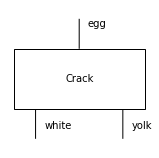

In [3]:
from discopy import Box

crack = Box('Crack', dom=egg, cod=white @ yolk)

crack.draw(figsize=(2, 2))

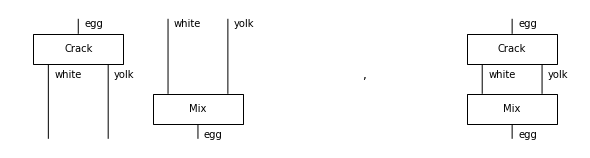

In [4]:
from discopy import drawing

mix = Box('Mix', white @ yolk, egg)

crack_tensor_mix = crack @ mix
crack_then_mix = crack >> mix

drawing.equation(crack_tensor_mix, crack_then_mix, space=2, symbol=', ', figsize=(8, 2))

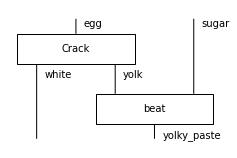

In [5]:
from discopy import Id

assert crack >> Id(white @ yolk) == crack == Id(egg) >> crack
assert crack @ Id(Ty()) == crack == Id(Ty()) @ crack

sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
beat = Box('beat', yolk @ sugar, yolky_paste)

crack_then_beat = crack @ Id(sugar) >> Id(white) @ beat

crack_then_beat.draw(figsize=(3, 2))

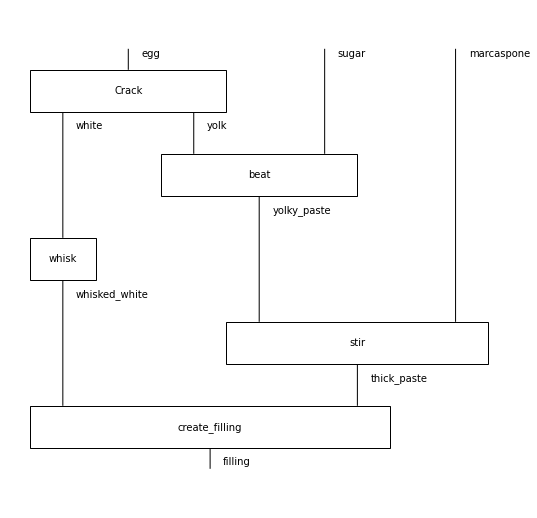

In [6]:
white, whisked_whites = Ty('white'), Ty('whisked_white')
cream, thick_paste = Ty('marcaspone'), Ty('thick_paste')
creama = Ty('filling')

whisk = Box('whisk', white, whisked_whites)

stir = Box('stir', yolky_paste @ cream, thick_paste)

create_filling = Box('create_filling', whisked_whites @ thick_paste, creama)


step_1 = crack @ Id(sugar) @ Id(cream)
step_2 = Id(white) @ beat  @ Id(cream)
step_3 = step_1 >> step_2 
step_4 =  step_3  >>  whisk @ Id(yolky_paste) @ Id(cream)
step_5 = step_4 >> Id(whisked_whites) @ stir 
step_6 = step_5 >> create_filling


step_6.draw(figsize=(7, 7))

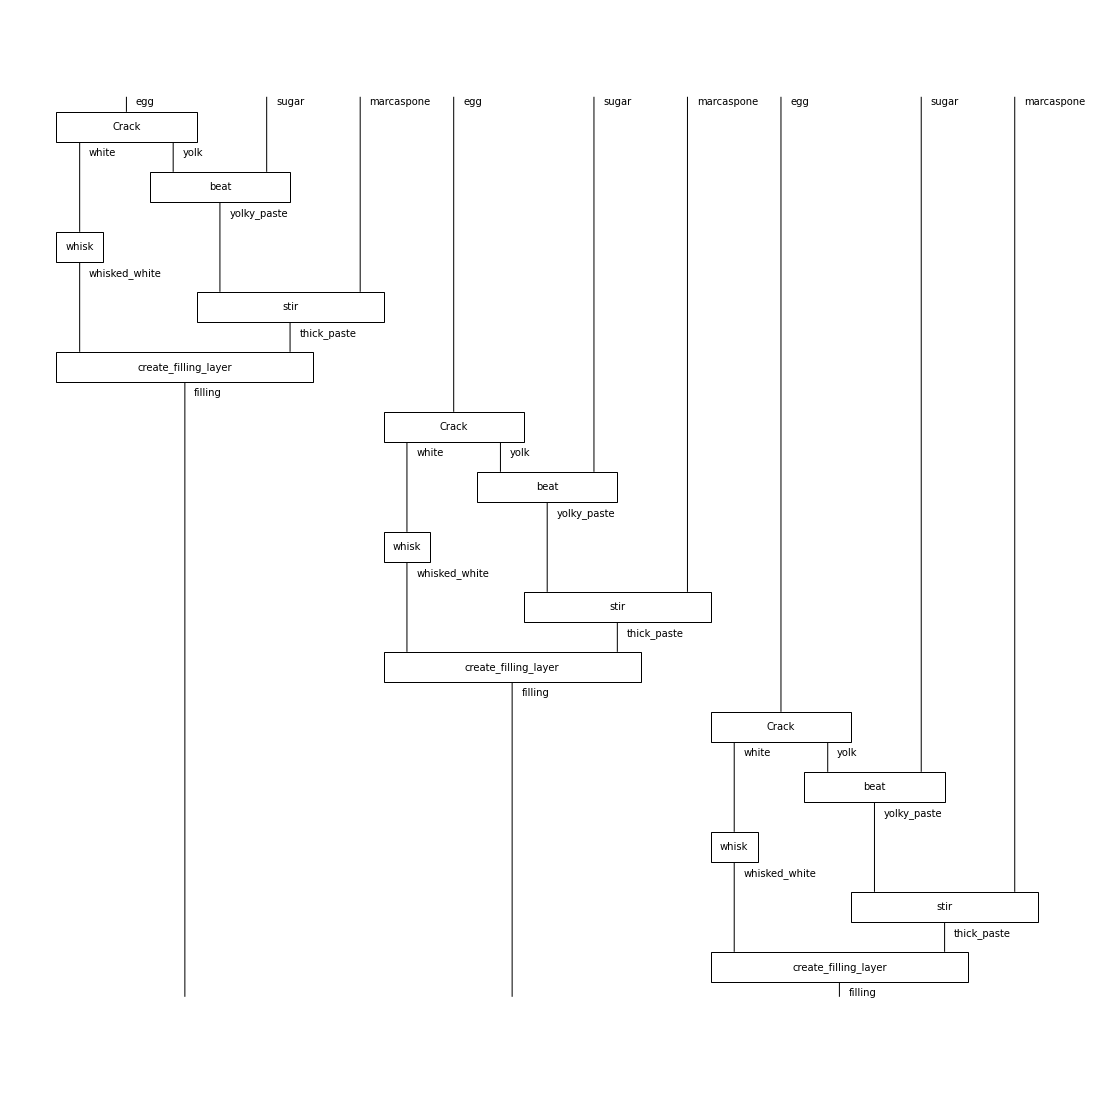

In [7]:


def get_tiramisu_layer(n):
    egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')
    crack = Box('Crack', dom=egg, cod=white @ yolk)
    sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
    beat = Box('beat', yolk @ sugar, yolky_paste)
    white, whisked_whites = Ty('white'), Ty('whisked_white')
    cream, thick_paste = Ty('marcaspone'), Ty('thick_paste')
    creama = Ty('filling')

    whisk = Box('whisk', white, whisked_whites)

    stir = Box('stir', yolky_paste @ cream, thick_paste)

    create_filling = Box('create_filling_layer', whisked_whites @ thick_paste, creama)


    step_1 = crack @ Id(sugar) @ Id(cream)
    step_2 = Id(white) @ beat  @ Id(cream)
    step_3 = step_1 >> step_2 
    step_4 =  step_3  >>  whisk @ Id(yolky_paste) @ Id(cream)
    step_5 = step_4 >> Id(whisked_whites) @ stir 
    step_6 = step_5 >> create_filling
    answer = step_6

    while(n-1):
        answer @= step_6
        n -= 1
    return answer

get_tiramisu_layer(3).draw(figsize=(15, 15))

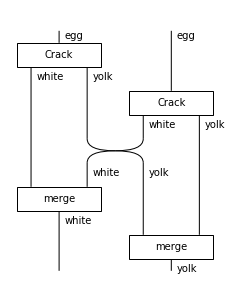

In [8]:
from discopy import Swap

merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ Swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw(figsize=(3, 4))

In [9]:
#########################

In [10]:
from discopy import Dim, Tensor

matrix = Tensor(Dim(2), Dim(2), [0, 1, 1, 0])

matrix.array

array([[0, 1],
       [1, 0]])

In [11]:
assert matrix >> Tensor.id(Dim(2)) == matrix == Tensor.id(Dim(2)) >> matrix

vector = Tensor(Dim(1), Dim(2), [0, 1])

vector >> matrix

Tensor(dom=Dim(1), cod=Dim(2), array=[1, 0])

In [12]:
assert Tensor.id(Dim(1)) @ matrix == matrix == matrix @ Tensor.id(Dim(1))

Tensor.id(Dim(1))

Tensor(dom=Dim(1), cod=Dim(1), array=[1.])

In [13]:
vector @ vector

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0, 0, 0, 1])

In [14]:
vector @ matrix

Tensor(dom=Dim(2), cod=Dim(2, 2), array=[0, 0, 0, 1, 0, 0, 1, 0])

In [15]:
import numpy as np

assert np.all(
    (matrix >> matrix).array == matrix.array.dot(matrix.array))
assert np.all(
    (matrix @ matrix).array == np.moveaxis(np.tensordot(
    matrix.array, matrix.array, 0), range(4), [0, 2, 1, 3]))

In [16]:
matrix = Tensor(Dim(2), Dim(2), [0, -1j, 1j, 0])

matrix >> matrix[::-1]

Tensor(dom=Dim(2), cod=Dim(2), array=[1.+0.j, -0.+0.j, -0.+0.j, 1.+0.j])

In [17]:
################### task 3 quantum circuits ###

In [18]:
##############exercises for task 3######################

In [19]:
####1 bell experiment using cirq#####

import cirq 


q0 = cirq.GridQubit(0, 0) 
q1 = cirq.GridQubit(0, 1) 


circuit = cirq.Circuit() 


circuit.append(cirq.H(q0)) 
circuit.append(cirq.CX(q0,q1)) 

circuit.append(cirq.measure(q0, key='m0'))  
circuit.append(cirq.measure(q1, key='m1')) 

print("Circuit:")
print(circuit) 

shots = 1000
simulator = cirq.Simulator() 
result = simulator.run(circuit, repetitions=shots) 

Circuit:
(0, 0): ───H───@───M('m0')───
               │
(0, 1): ───────X───M('m1')───


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: cirq.study.visualize.plot_state_histogram was used but is deprecated.
It will be removed in cirq v0.12.
use cirq.vis.plot_state_histogram or cirq.vis.get_state_histogram instead

  """Entry point for launching an IPython kernel.


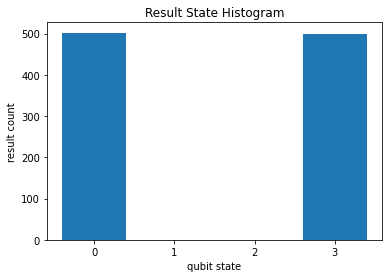

In [20]:
counts = cirq.plot_state_histogram(result)

In [21]:
print("Probabiity =", counts/shots) 

Probabiity = [0.502 0.    0.    0.498]


In [22]:
#####2 circuit to create GHZ state###

In [23]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(3)


circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)


circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [24]:
##### task 4 #####################
###part A#####

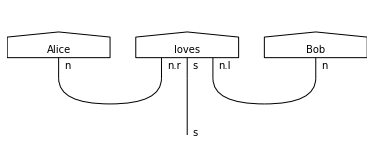

In [44]:
from discopy import Ty, Id, Word, Cup, pregroup
from discopy.grammar import draw

n, s = Ty('n'), Ty('s')

Alice = Word("Alice", n)
loves = Word("loves", n.r @ s @ n.l)
Bob = Word("Bob", n)

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

sentence = Alice @ loves @ Bob >> grammar
pregroup.draw(sentence, figsize=(5, 5))

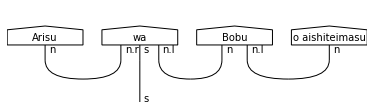

In [86]:
###Part A###

### 1 ####

###japanese###

n, s = Ty('n'), Ty('s')

wa = Word("wa", n.r @ s @ n.l)
o_aishiteimasu = Word("o aishiteimasu", n)

Arisu = Word("Arisu", n)
Bobu = Word("Bobu", n @ n.l)

grammar1 = Cup(n, n.r) @ Id(s)  @ Cup(n.l, n) @ Cup(n.l, n) 

sentence = Arisu @ wa @ Bobu @ o_aishiteimasu >> grammar1
pregroup.draw(sentence, figsize=(5, 5))

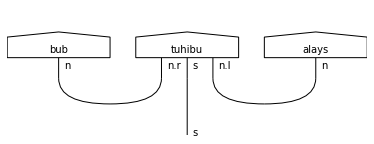

In [49]:
## 2 ###

Alice = Word("bub", n)
loves = Word("tuhibu", n.r @ s @ n.l)
Bob = Word("alays", n)

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

sentence = Alice @ loves @ Bob >> grammar
pregroup.draw(sentence, figsize=(5, 5))


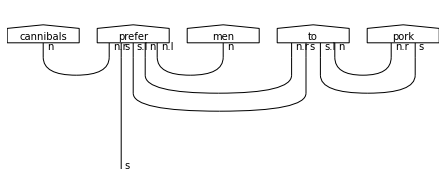

In [87]:
###cannibals prefer man to pork###
from discopy import Diagram, grammar
cannibals_prefer = Diagram(
    dom=Ty(),
    cod=Ty('s'),
    boxes=[
        Word('cannibals', Ty('n')),
        Word('prefer', Ty(Ob('n', z=1), 's', Ob('s', z=-1), 'n', Ob('n', z=-1))),
        Word('men', Ty('n')),
        Word('to', Ty(Ob('n', z=1), 's', Ob('s', z=-1), 'n')),
        Word('pork', Ty(Ob('n', z=1), 's')),
        Cup(Ty('n'), Ty(Ob('n', z=1))),
        Cup(Ty(Ob('n', z=-1)), Ty('n')),
        Cup(Ty('n'), Ty(Ob('n', z=1))),
        Cup(Ty(Ob('s', z=-1)), Ty('s')),
        Cup(Ty('n'), Ty(Ob('n', z=1))),
        Cup(Ty(Ob('s', z=-1)), Ty('s'))],
    offsets=[0, 1, 6, 7, 11, 0, 3, 2, 1, 2, 1]
)

#cannibals_prefer.draw()
grammar.draw(cannibals_prefer)

In [ ]:
#################
###Part B###

In [45]:
from discopy import Dim, Tensor, tensor
F = tensor.Functor(
    ob={n: 2, s: 1},
    ar={Alice: [0, 1], loves: [0, 1, 1, 0], Bob: [1, 0]})

print(F(Alice @ loves @ Bob))
print(F(grammar))

assert F(Alice @ loves @ Bob >> grammar) == 1

Tensor(dom=Dim(1), cod=Dim(2, 2, 2, 2), array=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])
Tensor(dom=Dim(2, 2, 2, 2), cod=Dim(1), array=[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])


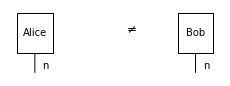

In [46]:
assert not F(Alice) >> F(Bob)[::-1]

drawing.equation(Alice, Bob, symbol="$\\neq$", figsize=(3, 1))

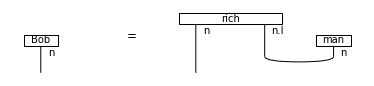

In [47]:
rich, man = Word("rich", n @ n.l), Word("man", n)

F.ar[rich], F.ar[man] = [1, 0, 0, 0], [1, 0]

rich_man = rich @ man >> Id(n) @ Cup(n.l, n)

assert F(Bob) >> F(rich_man)[::-1]  # i.e. Bob is a rich man.

drawing.equation(Bob, rich_man, figsize=(5, 1))

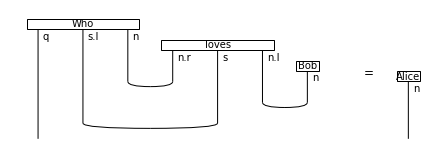

In [48]:
q = Ty('q')

Who = Word("Who", q @ s.l @ n)

F.ob[q], F.ar[Who] = 2, [1, 0, 0, 1]

question = Who @ loves @ Bob\
    >> Id(q @ s.l) @ Cup(n, n.r) @ Id(s) @ Cup(n.l, n)\
    >> Id(q) @ Cup(s.l, s) 

answer = Alice

assert F(question) == F(answer)

drawing.equation(question, answer, figsize=(6, 2))